# Halo Mass Calculations

In [38]:
# imports
import numpy as np
from matplotlib import pyplot as plt

from scipy.interpolate import InterpolatedUnivariateSpline as IUS

import aemHMF

from astropy.cosmology import Planck15 as cosmo
from astropy import units
from astropy import constants

## Cosmology

In [17]:
# https://github.com/astropy/astropy/blob/master/astropy/cosmology/parameters.py
sigma8=0.8159
ns=0.9667
Neff=3.046

In [20]:
cosmo_dict = {"om":cosmo.Om0,"ob":cosmo.Ob0,"ol":1.-cosmo.Om0,"ok":0.0,
              "h":cosmo.h,"s8":sigma8,"ns":ns,"w0":-1.0,"Neff":Neff} # "wa":0.0 is assumed internally

## Instantiate

In [21]:
hmf = aemHMF.Aemulus_HMF()
hmf.set_cosmology(cosmo_dict)

## Integrate Mass

### $d n / dlogM$

In [54]:
Mlow = 1e10
Mhigh = 1e17

In [55]:
a = 1.0 #Scale factor

M = np.logspace(np.log10(Mlow), np.log10(Mhigh), num=1000)
lM = np.log(M)
dndlM = np.array([hmf.dndlM(Mi, a) for Mi in M])

In [56]:
logM = np.log10(M)
dlogM = logM - np.roll(logM,1)
dlogM[0] = dlogM[1]

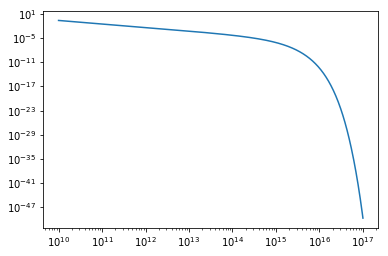

In [57]:
plt.clf()
ax = plt.gca()
ax.plot(M, dndlM)
#
ax.set_yscale("log", nonposy='clip')
ax.set_xscale("log", nonposx='clip')
plt.show()

### Spline

In [58]:
spl = IUS(lM, M*dndlM)

### Integrate

In [59]:
rho_tot =  spl.integral(np.log(Mlow), np.log(Mhigh)) *constants.M_sun/units.Mpc**3
rho_tot.to('Msun/Mpc**3') # h**-3 ??

<Quantity 4.40683504e+10 solMass / Mpc3>

### Compare

In [60]:
rho_DM = cosmo.critical_density0 * cosmo.Odm0
rho_DM.to('Msun/Mpc**3')

<Quantity 3.29718064e+10 solMass / Mpc3>

In [61]:
(rho_tot*cosmo.h**3 / rho_DM).decompose()

<Quantity 0.41545083>